In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import csv
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from datetime import date
import matplotlib.pyplot as plt
from pylab import rcParams
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.metrics import mean_squared_error
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from keras.layers.core import Activation
from keras.layers import Bidirectional

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  
Using TensorFlow backend.
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecate

In [2]:
def parser(x):
    # return datetime
    return datetime.strptime(x, '%m/%d/%Y')

# read the csv file
dataset = pd.read_csv("Brent_Weekly.csv", parse_dates=['Week of'], date_parser=parser)
dataset.head(10)

dataset = dataset.sort_values('Week of')
dataset = dataset.groupby('Week of')['Europe Brent Spot Price FOB  Dollars per Barrel'].sum().reset_index()
dataset.set_index('Week of', inplace=True)
dataset.head()

,Europe Brent Spot Price FOB Dollars per Barrel
Week of,
1987-05-15,18.58
1987-05-22,18.54
1987-05-29,18.60
1987-06-05,18.70
1987-06-12,18.75


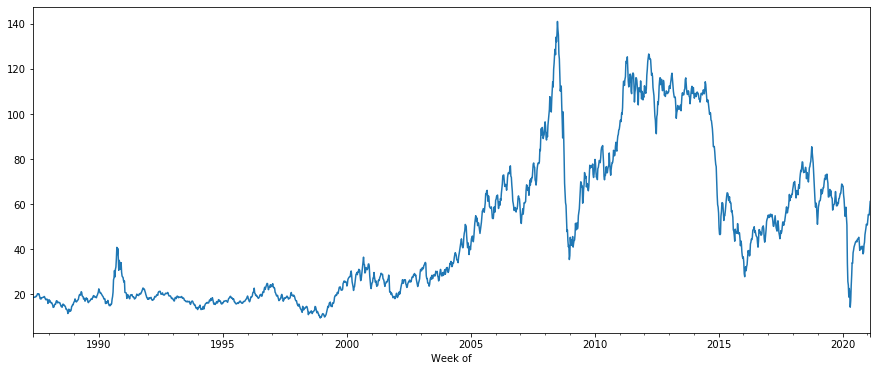

In [3]:
y = dataset['Europe Brent Spot Price FOB  Dollars per Barrel']
y.plot(figsize=(15, 6))
plt.show()

In [4]:
scaler = MinMaxScaler(feature_range = (0, 1))
df = scaler.fit_transform(dataset)

In [5]:
train_size = int(len(df) * 0.75)
train, test = df[0:train_size, :], df[train_size:len(df), :]
valid_size = int(len(train) * 0.7)
train1, valid = train[0:valid_size, :], train[valid_size:len(train), :]

In [6]:
def create_data_set(dataset, n_steps = 1):
    data_x, data_y = [], []
    for i in range(len(dataset) - n_steps - 1):
        a = dataset[i:(i + n_steps), 0]
        data_x.append(a)
        data_y.append(dataset[i + n_steps, 0])
    return np.array(data_x), np.array(data_y)

In [7]:
n_steps = 2
n_features = 1
X_train,Y_train,X_test,Y_test,X_valid,Y_valid  = [],[],[],[],[],[]

X_train,Y_train=create_data_set(train1,n_steps)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], n_features))

X_test,Y_test=create_data_set(test,n_steps)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], n_features))

X_valid,Y_valid=create_data_set(valid,n_steps)
X_valid = np.reshape(X_valid, (X_valid.shape[0], X_valid.shape[1], n_features))

In [8]:
model = Sequential()
model.add(LSTM(10, return_sequences = False, input_shape = (n_steps, n_features)))
# model.add(LSTM(50, return_sequences = True, input_shape = (n_steps, n_features)))
# model.add(LSTM(50, return_sequences = True))
# model.add(LSTM(50, return_sequences = False))
model.add(Dropout(0.05))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

call_back = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 30)
history = model.fit(X_train, Y_train, epochs = 1000, batch_size = 128, validation_data = (X_valid, Y_valid), callbacks = [call_back], shuffle = False)


Train on 921 samples, validate on 394 samples
Epoch 1/1000
921/921 [==============================] - 0s 343us/step - loss: 0.0079 - val_loss: 0.2591
Epoch 2/1000
921/921 [==============================] - 0s 18us/step - loss: 0.0050 - val_loss: 0.2334
Epoch 3/1000
921/921 [==============================] - 0s 16us/step - loss: 0.0033 - val_loss: 0.2111
Epoch 4/1000
921/921 [==============================] - 0s 15us/step - loss: 0.0024 - val_loss: 0.1924
Epoch 5/1000
921/921 [==============================] - 0s 15us/step - loss: 0.0020 - val_loss: 0.1776
Epoch 6/1000
921/921 [==============================] - 0s 15us/step - loss: 0.0019 - val_loss: 0.1664
Epoch 7/1000
921/921 [==============================] - 0s 16us/step - loss: 0.0020 - val_loss: 0.1580
Epoch 8/1000
921/921 [==============================] - 0s 17us/step - loss: 0.0021 - val_loss: 0.1519
Epoch 9/1000
921/921 [==============================] - 0s 16us/step - loss: 0.0021 - val_loss: 0.1473
Epoch 10/1000
921/921 [==

921/921 [==============================] - 0s 15us/step - loss: 3.0701e-04 - val_loss: 0.0049
Epoch 77/1000
921/921 [==============================] - 0s 15us/step - loss: 2.9734e-04 - val_loss: 0.0043
Epoch 78/1000
921/921 [==============================] - 0s 15us/step - loss: 2.7552e-04 - val_loss: 0.0039
Epoch 79/1000
921/921 [==============================] - 0s 16us/step - loss: 2.6164e-04 - val_loss: 0.0035
Epoch 80/1000
921/921 [==============================] - 0s 18us/step - loss: 2.3838e-04 - val_loss: 0.0031
Epoch 81/1000
921/921 [==============================] - 0s 16us/step - loss: 2.3163e-04 - val_loss: 0.0028
Epoch 82/1000
921/921 [==============================] - 0s 15us/step - loss: 2.2805e-04 - val_loss: 0.0025
Epoch 83/1000
921/921 [==============================] - 0s 14us/step - loss: 2.1778e-04 - val_loss: 0.0022
Epoch 84/1000
921/921 [==============================] - 0s 14us/step - loss: 2.1562e-04 - val_loss: 0.0020
Epoch 85/1000
921/921 [===================

In [9]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

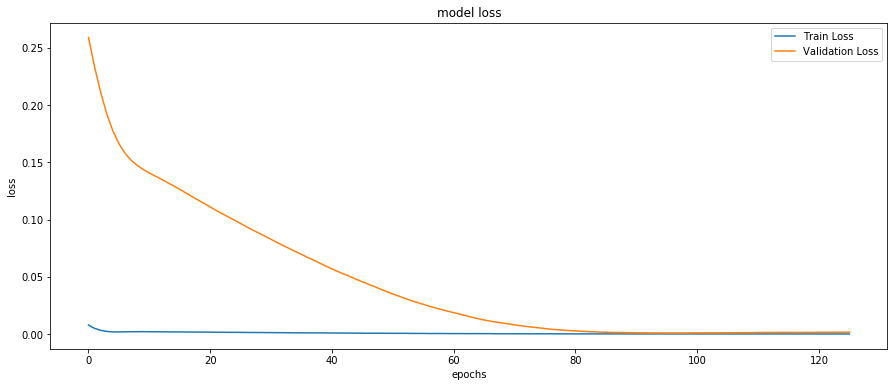

In [10]:
plt.figure(figsize = (15,6))
plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc = 'upper right')
plt.show();

In [11]:
# # invert predictions
train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform([Y_train])
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform([Y_test])

In [12]:
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_train[0], train_predict[:,0])))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test[0], test_predict[:,0])))

Train Root Mean Squared Error: 1.3047291314802705
Test Root Mean Squared Error: 4.651542055458847


In [13]:
print('Train Mean Absolute Error:', mean_absolute_error(Y_train[0], train_predict[:,0]))
print('Test Mean Absolute Error:', mean_absolute_error(Y_test[0], test_predict[:,0]))

Train Mean Absolute Error: 0.9071448638617797
Test Mean Absolute Error: 3.578504406480484


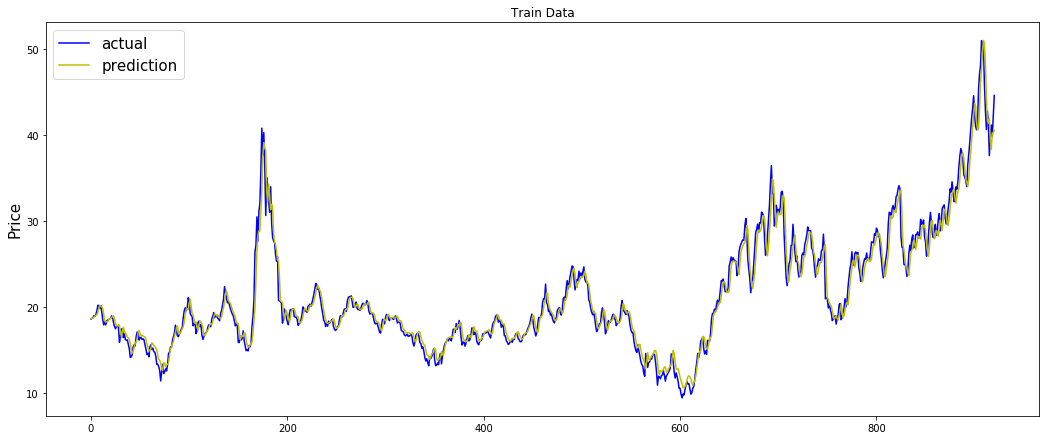

In [14]:
# Compare train data Actual vs. Prediction
plt.style.context("seaborn-white")
plt.figure(figsize=(15,6))
plt.plot(Y_train[0], 'b', label="actual")
plt.plot(train_predict, 'y', label="prediction")
plt.tight_layout()
plt.title('Train Data')
# sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('Price', size=15)
plt.legend(fontsize=15)
plt.show();

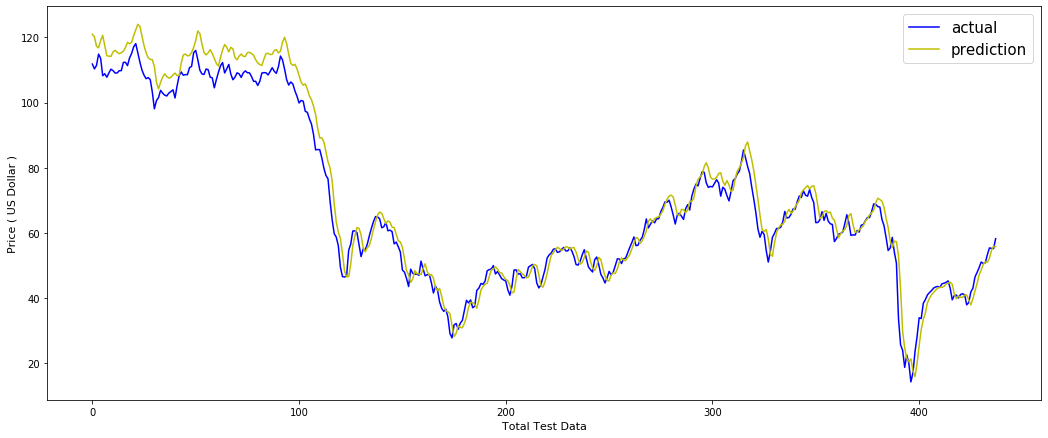

In [18]:
# Compare test data Actual vs. Prediction
plt.figure(figsize=(15,6))
plt.plot(Y_test[0], 'b', label="actual")
plt.plot(test_predict, 'y', label="prediction")
plt.tight_layout()
# sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('Price ( US Dollar )', size=11)
plt.xlabel('Total Test Data', size=11)
plt.legend(fontsize=15)
plt.show();